* Loaded Needed Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import glob as gb
import cv2 
import os

* Read Data 
1. Train Data 
2. Test Data 
3. Predict Data

In [2]:
trainpath = 'D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train'
testpath  = 'D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test'
predpath  = 'D:\\Programming\\Machine Learning Projects\\My Projects\Data\\seg_pred\\seg_pred'

* Seg Train Data in For Loop

In [3]:
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train\\' + folder +'/*.jpg'))
    print(f'For Training Data Found ==> {len(files)}  in folder ==> {folder}')

For Training Data Found ==> 2191  in folder ==> buildings
For Training Data Found ==> 2271  in folder ==> forest
For Training Data Found ==> 2404  in folder ==> glacier
For Training Data Found ==> 2512  in folder ==> mountain
For Training Data Found ==> 2274  in folder ==> sea
For Training Data Found ==> 2382  in folder ==> street


* Seg Test Data In For Loop

In [4]:
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test\\'+ folder + '/*.jpg'))
    print(f'For Test Data Found ==> {len(files)} in folder ==> {folder}')

For Test Data Found ==> 437 in folder ==> buildings
For Test Data Found ==> 474 in folder ==> forest
For Test Data Found ==> 553 in folder ==> glacier
For Test Data Found ==> 525 in folder ==> mountain
For Test Data Found ==> 510 in folder ==> sea
For Test Data Found ==> 501 in folder ==> street


* Seg Predicted Data In For Loop 

In [5]:
files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\Data\\seg_pred\\seg_pred/*.jpg'))
print(f' For Prediction Data Found ==> {len(files)}')

 For Prediction Data Found ==> 7301


* Create Function Used To Checking Items 
1. now we need to heck the images sizes , to know ow they looks like  since we have 6 categories , 
we first need to create a dictionary with their names & indices , also create a function to get the code back

In [6]:
code = {'buildings':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
def getcode(n):
    for x , y  in code.items():
        if n == y :
            return x

* now how about the images sizes in train folder

In [7]:
#1. Create Empty List Call Size 
size = []
#2. Create For Loop Because Detect Numbers Of Images In Seg Train Data
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train\\'+ folder +'/*.jpg'))
    for file in files :
        image = plt.imread(file) 
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
dtype: int64

* now how about the images sizes in test folder

In [8]:
#1. Create Empty List Named Size 
size =[]
#2. Create For Loop Because Calcuate The Same Numbers In Each Image In Test Data
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test\\' + folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

* now how about the images sizes in Prdeictions folder

In [9]:
size = []
#for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\Data\\seg_pred\\seg_pred'):
files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\Data\\seg_pred\\seg_pred/*.jpg'))
for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(129, 150, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
dtype: int64

# Reading Images
* now it's time to read all images & convert it into arrays
* first we'll create a variable s , which refer to size , so we can change it easily
* let's use now size = 200 , so it will be suitable amount to contain accuracy without losing so much time in training

In [10]:
s = 100

* now to read all pictues in six categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function

In [11]:
x_train = []
y_train = []
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_train\\seg_train\\' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)# Using Cv2 Library Because Read Each File In Training Data
        image_matrix = cv2.resize(image,(s,s))#Using Cv2 Library Because Make Resize For Each Images In Eacg File and Save In Image_Matrix
        x_train.append(list(image_matrix))#all Image Matrix Save Values In Xtrain Data 
        y_train.append(code[folder]) # Y Train Conatin Labeled Data ==> And Use Code Function That Detect Each Image For Folder Numbers

* great , now how many items in X_train


In [12]:
print(f'The Number Of Items In Xtrain Data Is ==> {len(x_train)} , Items ')

The Number Of Items In Xtrain Data Is ==> 14034 , Items 


* also we have have a look to random pictures in X_train , and to adjust their title using the y value

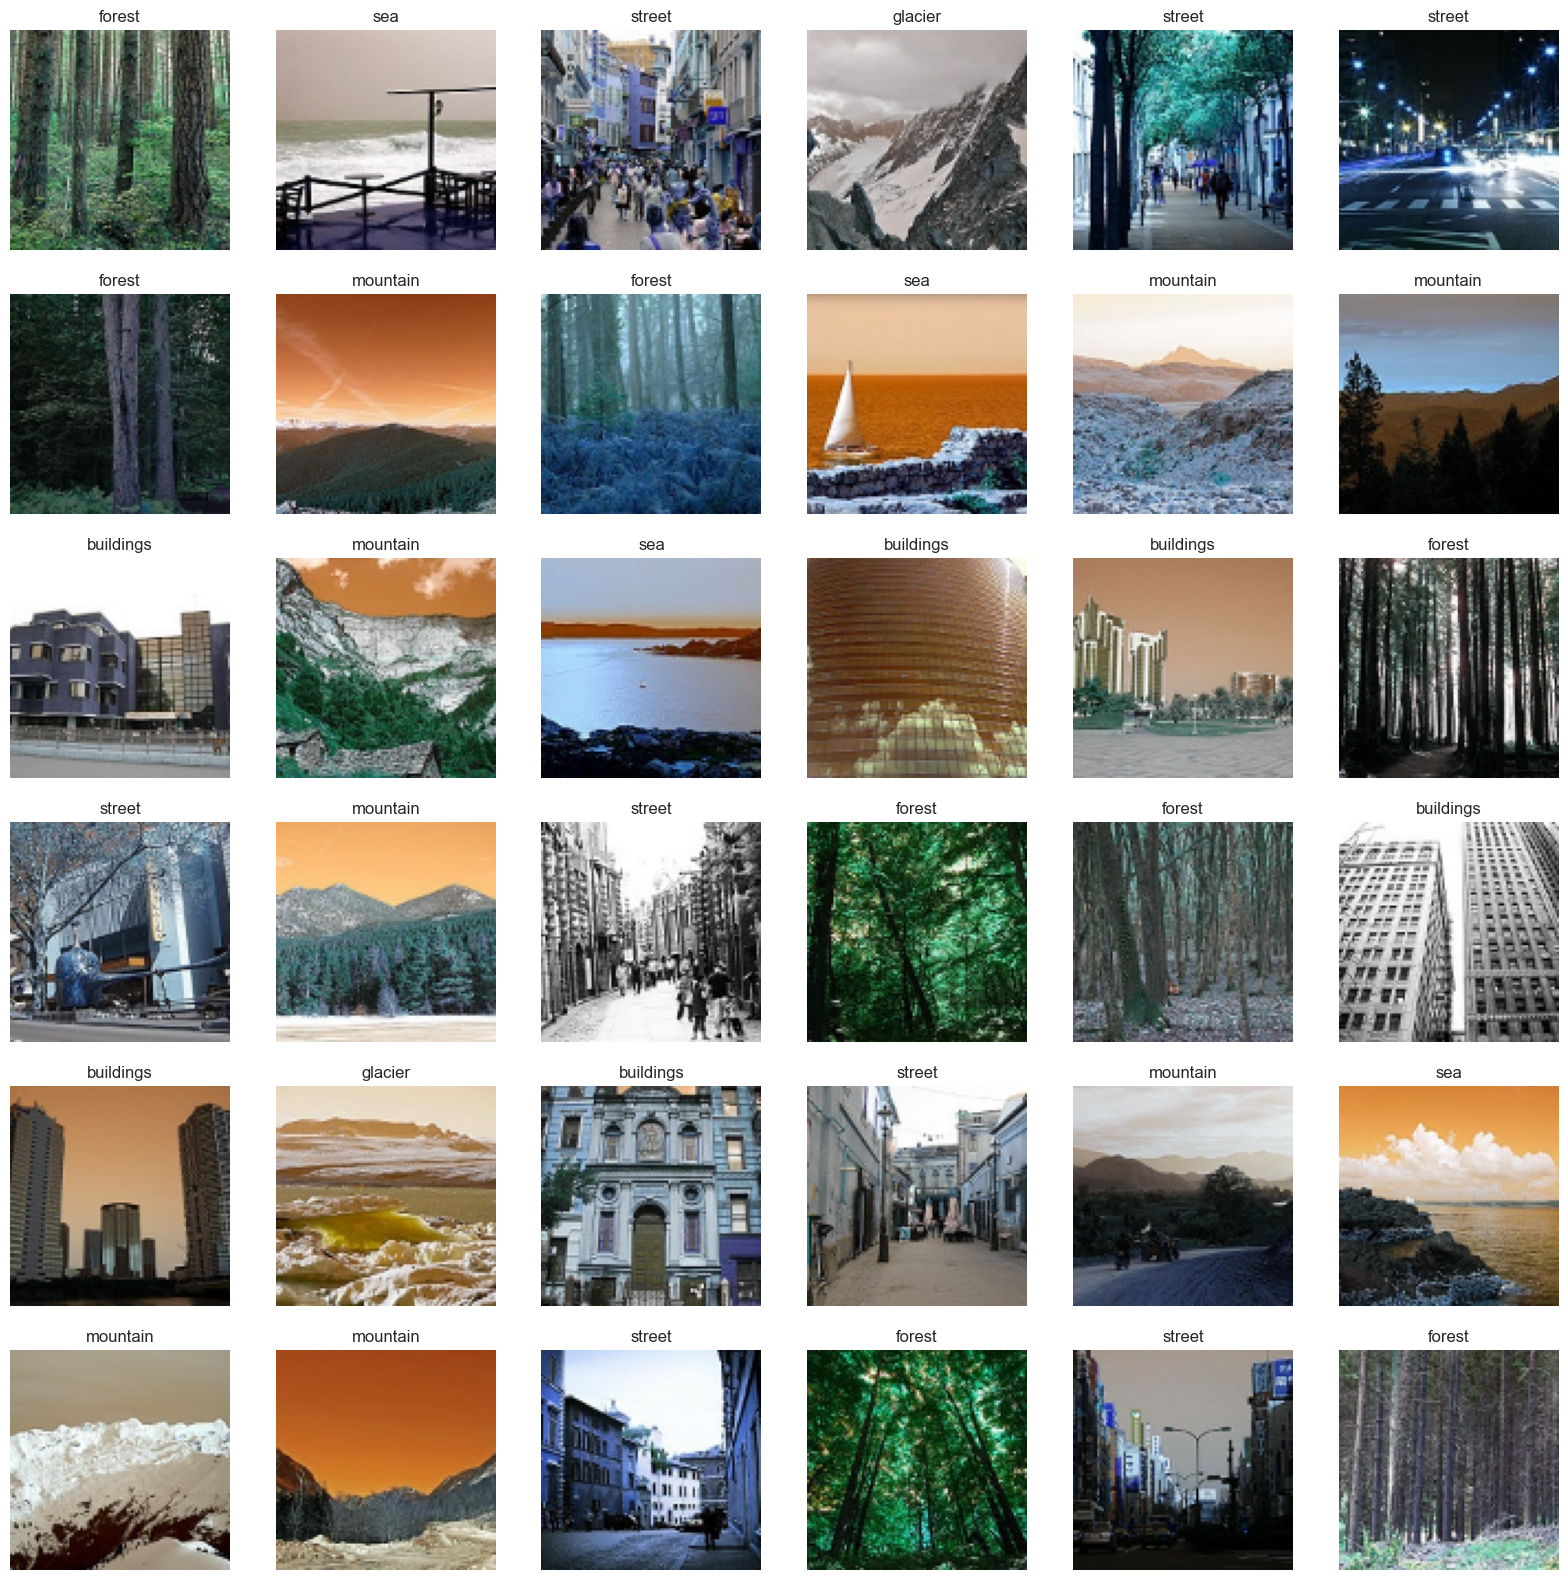

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

* great , now to repeat same steps exactly in test data

In [17]:
x_test = []
y_test = []
for folder in os.listdir('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test'):
    files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\seg_test\\seg_test\\' + folder +'/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image_array1= cv2.resize(image,(s,s))
        x_test.append(list(image_array1))
        y_test.append(code[folder])

In [18]:
print(f'The Have Length Of Test Images Is ==> {len(x_test)} Items')

The Have Length Of Test Images Is ==> 3000 Items


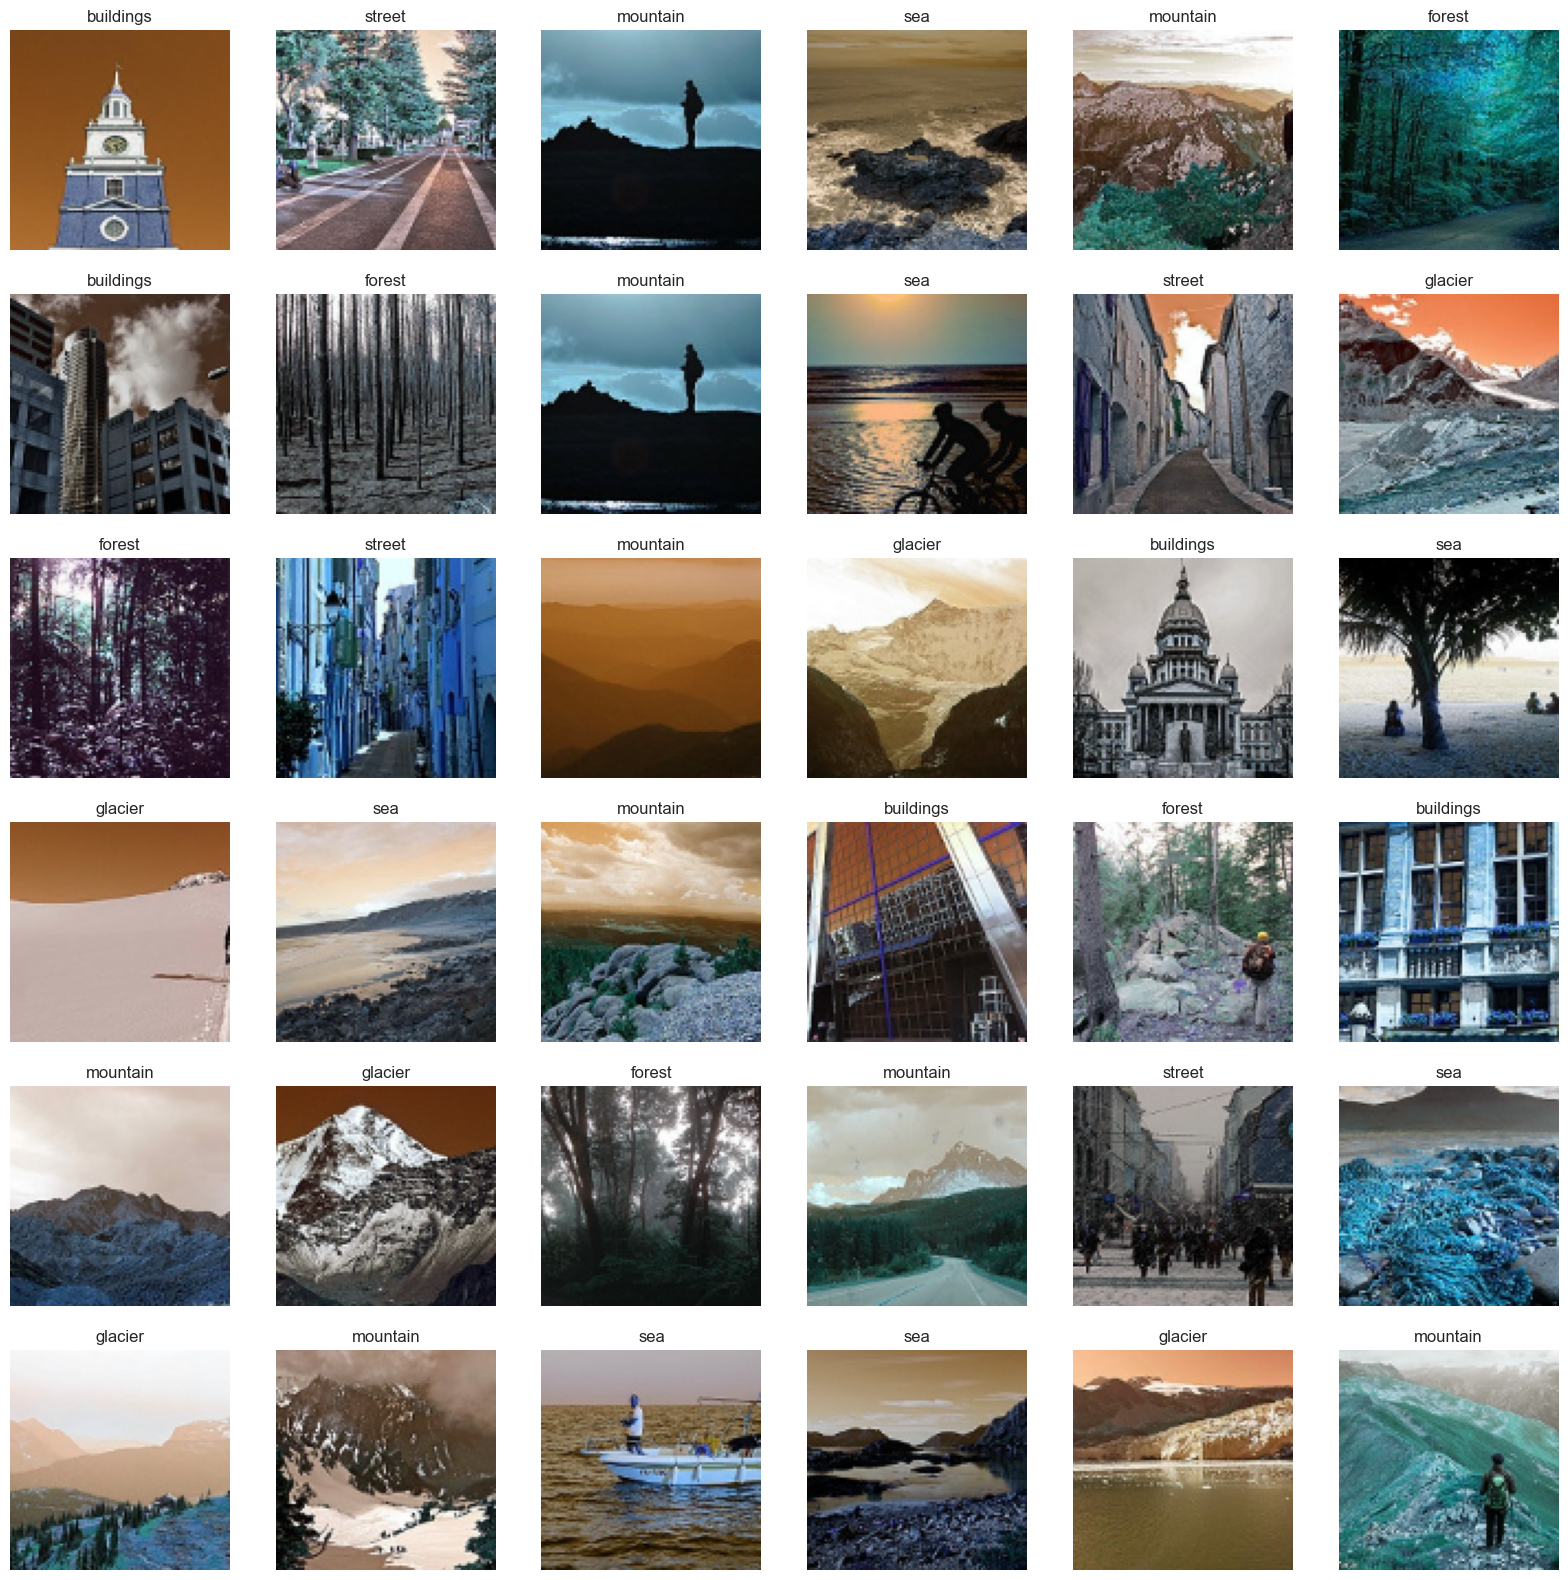

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

* also with Prediction data , without having title ofcourse

In [50]:
x_pred= []
files = gb.glob(pathname=str('D:\\Programming\\Machine Learning Projects\\My Projects\Data\\seg_pred\\seg_pred/*.jpg'))
for file in files : 
    image2 = cv2.imread(file)
    image_array2 =cv2.resize(image2,(s,s))
    x_pred.append(list[image_array2])

In [51]:
print(f'The Length Of X Predict Items Is ==> {len(x_pred)} Items')

The Length Of X Predict Items Is ==> 7301 Items


In [53]:
#plt.figure(figsize=(20,20))
#for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    #plt.subplot(6,6,n+1)
    #plt.imshow(x_pred[i])    
    #plt.axis('off')

# Buliding The Model 
1. Convert All Images Data To Array

In [67]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
x_pred_array = np.array(x_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'The Shape Of Xtrain Data After Convert To Xtrain Matrix Is ==> {x_train.shape}')#
print(f'The Shape Of Xtest Data After Convert  To Xtest  Matrix Is ==> {x_test.shape}')#
print(f'The Shape Of xpred Array After Convert Xpred To Matrix  Is ==> {x_pred_array.shape}')#
print(f'The Shape Of ytrain Data After Convert ytrain To Matrix Is ==> {y_train.shape}')#
print(f'The Shape Of ytest Data After Convert ytest To Matrix   Is ==> {y_test.shape}')#

The Shape Of Xtrain Data After Convert To Xtrain Matrix Is ==> (14034, 100, 100, 3)
The Shape Of Xtest Data After Convert  To Xtest  Matrix Is ==> (3000, 100, 100, 3)
The Shape Of xpred Array After Convert Xpred To Matrix  Is ==> (7301,)
The Shape Of ytrain Data After Convert ytrain To Matrix Is ==> (14034,)
The Shape Of ytest Data After Convert ytest To Matrix   Is ==> (3000,)


# Applying CCN 

In [78]:
from tensorflow import keras
from keras.layers import Dense ,Dropout 
from keras.layers.convolutional import Conv1D,Conv2D,Conv3D,MaxPooling1D,MaxPooling2D,MaxPooling3D
from keras.activations import relu ,elu ,exponential,softmax,sigmoid,tanh,leaky_relu,linear
model = keras.models.Sequential()
model.add(Conv2D(filters=200 , kernel_size=(3,3),activation=relu,input_shape = (s,s,3)))
model.add(Conv2D(filters=150,kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(4,4,))
model.add(Conv2D(120,kernel_size=(3,3),activation=relu))
model.add(Conv2D(filters=80,kernel_size=(3,3),activation=relu))
model.add(Conv2D(filters=50,kernel_size=(3,3),activation=relu))
model.add(MaxPooling2D(4,4))
model.add(keras.layers.Flatten())
model.add(Dense(120 , activation=relu))
model.add(Dense(100,activation=relu))
model.add(Dense(50,activation=relu))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation=softmax))      
'''
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])'''

"\nKerasModel = keras.models.Sequential([\n        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),\n        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),\n        keras.layers.MaxPool2D(4,4),\n        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    \n        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    \n        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),\n        keras.layers.MaxPool2D(4,4),\n        keras.layers.Flatten() ,    \n        keras.layers.Dense(120,activation='relu') ,    \n        keras.layers.Dense(100,activation='relu') ,    \n        keras.layers.Dense(50,activation='relu') ,        \n        keras.layers.Dropout(rate=0.5) ,            \n        keras.layers.Dense(6,activation='softmax') ,    \n        ])"

* now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [79]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

* so how the model looks like ?

In [80]:
print('\t\t The Details And Summary For Model Is : \n',model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 200)       5600      
                                                                 
 conv2d_17 (Conv2D)          (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 150)      0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 120)       162120    
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 80)        86480     
                                                                 
 conv2d_20 (Conv2D)          (None, 18, 18, 50)        36050     
                                                      

In [83]:
model.fit(x_train,y_train,epochs=70,batch_size=64,verbose=1)

Epoch 1/70
220/220 [==============================] - 932s 4s/step - loss: 1.2657 - accuracy: 0.4736
Epoch 2/70
220/220 [==============================] - 1060s 5s/step - loss: 1.0915 - accuracy: 0.5685
Epoch 3/70
220/220 [==============================] - 982s 4s/step - loss: 0.9299 - accuracy: 0.6527
Epoch 4/70
220/220 [==============================] - 808s 4s/step - loss: 0.8583 - accuracy: 0.6917
Epoch 5/70
220/220 [==============================] - 807s 4s/step - loss: 0.7526 - accuracy: 0.7342
Epoch 6/70
220/220 [==============================] - 3704s 17s/step - loss: 0.6893 - accuracy: 0.7656
Epoch 7/70
220/220 [==============================] - 979s 4s/step - loss: 0.6214 - accuracy: 0.7931
Epoch 8/70
220/220 [==============================] - 956s 4s/step - loss: 0.5843 - accuracy: 0.8052
Epoch 9/70
220/220 [==============================] - 938s 4s/step - loss: 0.5354 - accuracy: 0.8195
Epoch 10/70
 40/220 [====>.........................] - ETA: 29:46 - loss: 0.5270 - accur